**Model Evaluation**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score,precision_score,f1_score,recall_score
from sklearn.calibration import calibration_curve

In [33]:
model = joblib.load("../models/logistic_regression_shot_mode.joblib")
model_eval = pd.read_csv("../data/model_eval.csv")

threshold = 0.44
prediction = (model_eval["expected prob"] >= threshold).astype(int)
print("naive estimate based on fg% in the nba")
print("Accuracy: ", accuracy_score(model_eval["actual"],prediction))
print("log loss: ",  log_loss(model_eval["actual"],prediction))

naive estimate based on fg% in the nba
Accuracy:  0.6163641786935273
log loss:  13.827636570819788


threshold 0.2699999999999999: highest f1 score: 0.6414045446693573


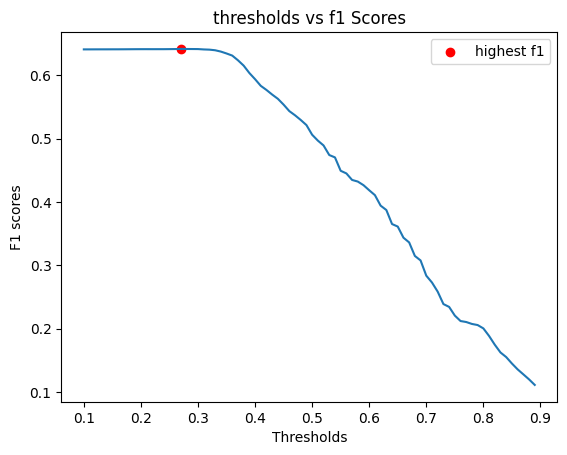

In [ ]:
thresholds = np.arange(0.1,0.9,0.01)
f1_scores = []
highest_f1 = 0
highest_f1_thres = 0
for t in thresholds:
    prediction = (model_eval["expected prob"] >= t).astype(int)
    precision = precision_score(model_eval["actual"],prediction)
    recall = recall_score(model_eval["actual"],prediction)
    f1 = f1_score(model_eval["actual"],prediction)
    f1_scores.append(f1)
    if f1 > highest_f1:
        highest_f1 = f1
        highest_f1_thres = t

print(f"threshold {highest_f1_thres}: highest f1 score: {highest_f1}")
plt.plot(thresholds, f1_scores)
plt.scatter(highest_f1_thres,highest_f1, color = "red", marker = "o", label = "highest f1")
plt.title("thresholds vs f1 Scores")
plt.xlabel("Thresholds")
plt.ylabel("F1 scores")
plt.legend()
plt.show()


threshold 0.5099999999999998: highest accuracy: 0.6263680792969736


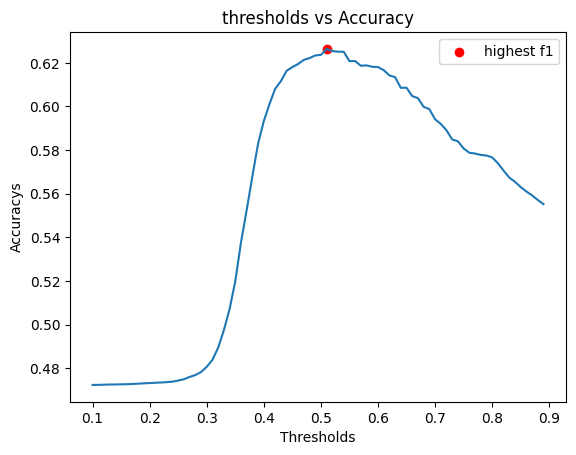

In [ ]:
accuracys = []
highest_accuracy = 0
highest_acc_thres = 0
for t in thresholds:
    prediction = (model_eval["expected prob"] >= t).astype(int)
    accuracy = accuracy_score(model_eval["actual"],prediction)
    accuracys.append(accuracy)
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        highest_acc_thres = t

print(f"threshold {highest_acc_thres}: highest accuracy: {highest_accuracy}")
plt.plot(thresholds, accuracys)
plt.scatter(highest_acc_thres,highest_accuracy, color = "red", marker = "o", label = "highest accuracy")
plt.title("thresholds vs Accuracy")
plt.xlabel("Thresholds")
plt.ylabel("Accuracys")

plt.legend()
plt.show()

In [39]:
#for the threshold of highest f1 score vs highest accyracy
threshold_f1 = 0.2699
prediction = (model_eval["expected prob"] >= threshold_f1).astype(int)
accuracy = accuracy_score(model_eval["actual"],prediction)
logloss = log_loss(model_eval["actual"],prediction)
precision = precision_score(model_eval["actual"],prediction)
recall = recall_score(model_eval["actual"],prediction)
f1 = f1_score(model_eval["actual"],prediction)
print("maximise f1")
print(f"threshold: {threshold_f1}")
print(f"accuracy: {accuracy}")
print(f"log loss: {logloss}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1} \n")


threshold_acc = 0.5099
prediction = (model_eval["expected prob"] >= threshold_acc).astype(int)
accuracy = accuracy_score(model_eval["actual"],prediction)
logloss = log_loss(model_eval["actual"],prediction)
precision = precision_score(model_eval["actual"],prediction)
recall = recall_score(model_eval["actual"],prediction)
f1 = f1_score(model_eval["actual"],prediction)
print("maximise accuracy")
print(f"threshold: {threshold_acc}")
print(f"accuracy: {accuracy}")
print(f"log loss: {logloss}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1}")


maximise f1
threshold: 0.2699
accuracy: 0.4759883440791134
log loss: 18.887294497869757
precision: 0.47293948727449575
recall: 0.9961465294375884
f1 score: 0.6413743286957068 

maximise accuracy
threshold: 0.5099
accuracy: 0.626413968749283
log loss: 13.465405421416731
precision: 0.6778217988704375
recall: 0.3922247695234379
f1 score: 0.49691014707699915


intersection point:
Threshold: [0.4]
Accuracy: [0.59330473]
F1: [0.59367765]


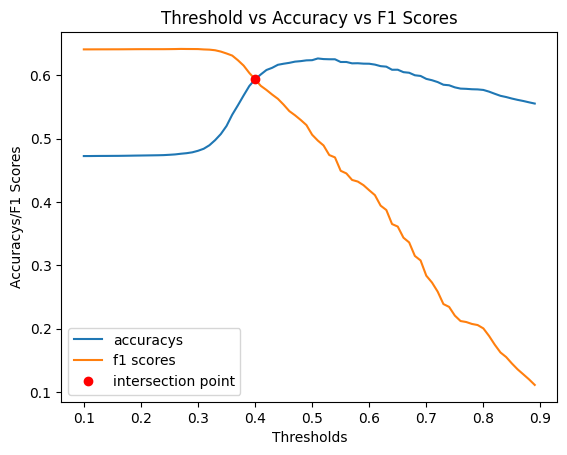

In [ ]:
#finding the intersection of the graphs for the best tradeoff between f1 score and accuracy
x_thres = np.array(thresholds)
y_acc = np.array(accuracys)
y_f1 = np.array(f1_scores)
plt.plot(thresholds, accuracys, label = "accuracys")
plt.plot(thresholds, f1_scores, label = "f1 scores")
plt.xlabel("Thresholds")
plt.ylabel("Accuracys/F1 Scores")
plt.title("Threshold vs Accuracy vs F1 Scores")
idx = np.argwhere(np.diff(np.sign(y_acc - y_f1))).flatten() #index of intersection point
print(f"intersection point:\nThreshold: {x_thres[idx]}\nAccuracy: {y_acc[idx]}\nF1: {y_f1[idx]}")
plt.plot(x_thres[idx], y_acc[idx], 'ro', label = "intersection point")
plt.legend()


In [ ]:
threshold_acc = 0.4
prediction = (model_eval["expected prob"] >= threshold_acc).astype(int)
accuracy = accuracy_score(model_eval["actual"],prediction)
logloss = log_loss(model_eval["actual"],prediction)
precision = precision_score(model_eval["actual"],prediction)
recall = recall_score(model_eval["actual"],prediction)
f1 = f1_score(model_eval["actual"],prediction)
print("tradeoff threshold")
print(f"threshold: {threshold_acc}")
print(f"accuracy: {accuracy}")
print(f"log loss: {logloss}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1}")